<a href="https://colab.research.google.com/github/BrenoBenevides/Data-Science/blob/master/Analise_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"> <img  width="50%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></p>


<h1><center> Análise de Dados do Airbnb - Rio de Janeiro <center></h1>

<p align='justify;'>

O [Airbnb](https://www.airbnb.com.br/) é uma plataforma que busca conectar hóspedes que desejam alugar um imóvel para passar algum tempo e não desejam pagar muito caro, com os anfitriões que desejam alugar aposentos de sua propriedade e faturar um dinheiro com isso.

Fundado em 2008 por 3 estudantes americanos de design,hoje o Airbnb já é considerada a maior plataforma de economia compartilhada do mundo, tendo conectado mais de **750 milhões de pessoas** com suas mais de **7 milhões de acomodações** e **50 mil serviços personalizados** espalhados ao longo de **220 países** e regiões.

Com essa idéia 'simples' e lógica,a empresa conseguiu criar um sistema de hospedagem altamente competitiva e que preocupa as redes de hotelaria tradicionais no mundo todo.

Hoje o Airbnb está avaliado em mais de **$ 1 bilhão de dólares** e está no ranking das 20 empresas mais inovadoras do mundo segundo a    [Fastcompany](https://www.fastcompany.com/company/airbnb).Detalhe ele **não possui nenhum hotel**.

</p>





## Obtenção dos Dados

Nesse projeto iremos analisar os dados disponibilizados pelo site [Inside Airbnb]((http://insideairbnb.com/get-the-data.html) referente à cidade do Rio de Janeiro e ver os insights que podemos tirar a partir deles.

In [2]:
# Importando bibliotecas iniciais

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as plx
import folium

%matplotlib inline

In [3]:
# Importando os dados

df = pd.read_csv('/content/listings.csv')

FileNotFoundError: ignored

## **Analise de Dados**

* Analise  do shape dos dados
* % de valores ausentes
* Distribuição das variáveis
* Análise e retirada de outliers
* Correlação das variáveis
* Eliminando variáveis não importantes
* Imóveis mais alugados
* Características dos imóveis mais caros
* Conclusão

**Descrição das variáveis**

* `id` - Numero de idenficação da entrada
* `name` - Nome do local de hospedagem
* `host_id` - Numero de identificação do host
* `neighbourhood_group` - Grupo de Bairro
* `neighbourhood` - Bairro do local de hospedagem
* `latitude` - Latitude do local de hospedagem
* `longitude` - Longitude do local de hospedagem
* `room_type` - Tipo de imóvel
* `price` - Preço do aluguel
* `minimum_nights` - Noites minimas de hospedagem
* `number_of_reviews` - Numero de visualizações
* `last_review` - Ultima visualização
* `reviews_per_month` - Numero de visitas por mês
* `calculated_host_listings_count` - Número de estabelecimentos do anfitrião
* `availability_365` - Disponibilidade no ano
---

In [ ]:
# Lendo as 5 primeiras entradas
df.head()

### **1. Analisando o formato dos dados**

Esse primeiro passo serve para ver a quantidade de entradas e variáveis no conjunto de dados,bem como os tipos de dados de cada coluna

* Abaixo verificamos que há 35870 entradas e 16 atributos. 

* Há de se notar que todas as colunas já estão nos formatos corretos

In [ ]:
# Analisar o numero de entradas e quantidade de variaveis
print('Entradas: {}'.format(df.shape[0]))
print('Variáveis: {}\n'.format(df.shape[1]))

#Verificar os tipos de Dados
display(df.dtypes)

Entradas: 35870
Variáveis: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2.Analisando os valores ausentes**

A qualidade de nossa análise pode ser prejudicada se nós tivermos valores ausentes. Portanto devemos analisar a melhor maneira de lidarmos com eles,sendo excluindo as instâncias ou aplicando algum método de preenchimento desses valores.

* É possível ver que a coluna `neighbourhood_group` tem 100% dos valores faltantes. Então devemos excluí-la.
* As colunas `reviews_per_mounth` e `last_review` possuem 41% dos valores ausentes. Vamos excluir a coluna `last_review` e analisar o que podemos fazer com a outra coluna.
* As colunas `name` e `host_id` tem 0.16% e 0.013% de valores ausentes.Então excluirei essas instâncias.

In [ ]:
# Analisando a porcentagem de dados ausentes por coluna
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  41.165319
last_review                        41.165319
name                                0.161695
host_name                           0.013939
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

In [ ]:
#Excluindo as colunas last_review e neighbourhood_group
df_clean = df.drop(columns=['neighbourhood_group','last_review'])

[texto do link](https://)Abaixo analisamos que a coluna revies_per_month possui 14766 linhas com valores nulos. É inviável excluir essa quantidade de linhas,visto que esse valor representa 41% do conjunto de dados. Então aplicarei uma técnica de preenchimento desses valores ausentes.

In [ ]:
# Atribuindo os valores ausentes em reviews per month para uma variavel
reviews = df_clean.loc[df_clean['reviews_per_month'].isnull()]

# Quantidade de linhas ausentes
print("Linhas Ausentes: {}".format(reviews.shape[0]))
print("% Total: {}".format('41%'))

Linhas Ausentes: 14766
% Total: 41%


In [ ]:
# Analisando os bairros mais visados
print('Representatividade 10 primeiros: {}\n'.format(reviews['neighbourhood'].value_counts(ascending=False)[:10].sum()/reviews.shape[0]))

reviews['neighbourhood'].value_counts(ascending=False)[:10]

Representatividade 10 primeiros: 0.6720167953406474



Copacabana                  2835
Barra da Tijuca             1834
Jacarepaguá                 1029
Recreio dos Bandeirantes     942
Ipanema                      891
Botafogo                     618
Leblon                       534
Tijuca                       431
Santa Teresa                 425
Centro                       384
Name: neighbourhood, dtype: int64

Pode se ver que os 10 primeiros bairros mais buscados representam 67% do total de valores ausentes. Então como os dados estão 'bem distribuidos',para não perder a coluna inteira irei substituir o numero de views ausentes pela média de reviews_per_month de acordo com cada bairro. Estou partindo do pressuposto que quando uma pessoa vai buscar por uma estadia,geralmente ela vá querer um bairro específico.

In [ ]:
def missing_reviews(data,column,col_mean,kind='mean'):
  
  #Agrupando pela media de reviews por bairro
  media_bairro = dict(data.groupby(col_mean)[column].mean())
  
  # Substituindo os valores ausentes pela média de reviews de cada bairro
  for index,row in data.loc[data[column].isnull()].iterrows():
    data.loc[index,column] = media_bairro[row[col_mean]]

In [ ]:
#Aplicando a funçao para substituir
missing_reviews(df_clean,'reviews_per_month','neighbourhood')

### **3.Distribuição das variáveis**

Agora irei verificar a distribuição dos dados para identificar possíveis outliers.

* **Price** = Existem preços na caso de dezenas de milhares de reais. Com certeza esses valores são outliers.

* **Minimum nights** = Há valores em minimum nights que dizem que os hosts so aceitam a partir de ,no mínimo,100 noites.Ninguém seria louco suficiente para fazer isso,é pedir pra perder dinheiro.Então com certeza essas instâncias são outliers.*italicized text*

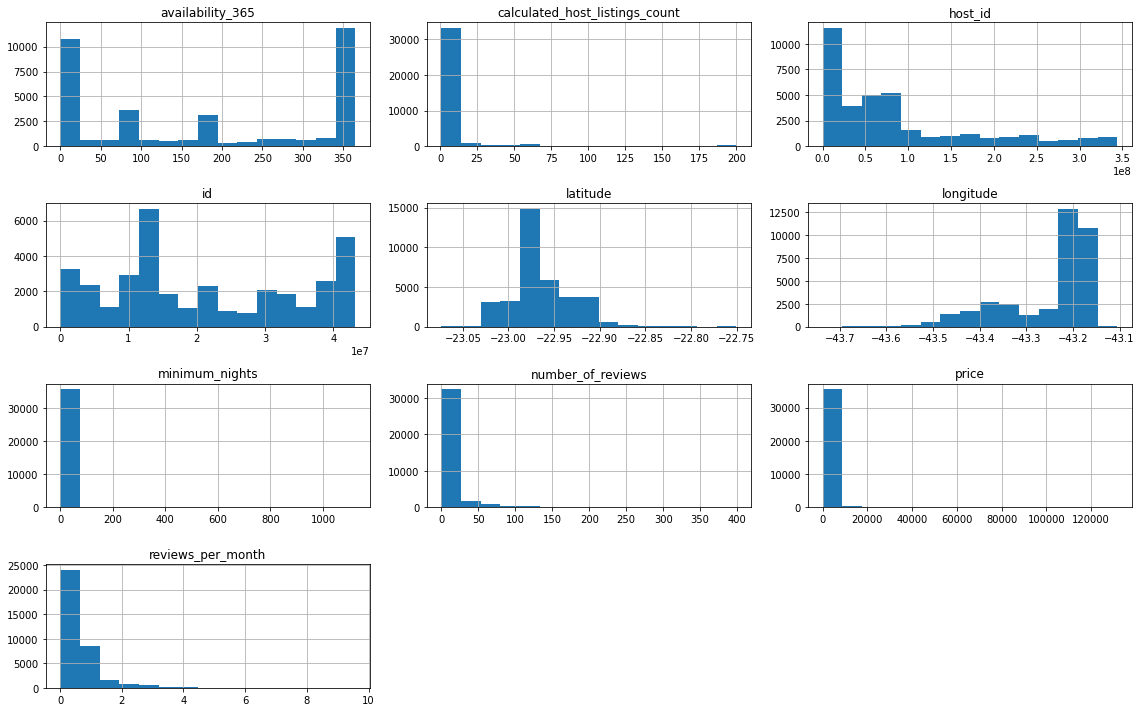

In [ ]:
df_clean.hist(figsize=(16,10),bins=15)
plt.tight_layout();

### **4.Análise e retirada de outliers.**

Agora irei analisar os ruídos dos outliers nos dados para que eu possa retirá-los.

Como foi visto anteriormente,as colunas **price** e **minimum_nights** possuiam ruídos. Analisarei eles através de um gráfico boxplot e compararei a média simples dessas colunas com a mediana e o desvio padrão.

**Price**

Como pode-se ver no código abaixo existem colunas com preço de estadia igual 0. Pela lógica esses valores são outliers. Então irei excluí-los.

In [ ]:
price_0 = df_clean[df_clean['price']==0].index

df_clean.drop(index=price_0,inplace=True)

In [ ]:
print("Media: {}".format(df_clean['price'].mean()))
print("Mediana: {}".format(df_clean['price'].median()))
print("Desvio Padrão: {}\n".format(df_clean['price'].std()))

Media: 753.833477400106
Mediana: 298.0
Desvio Padrão: 2229.559031419317



Analisando os valores,percebe-se que existem **outliers** que estão jogando a média e o desvio padrão lá pra cima.
Usando a mediana dá pra perceber com mais facilidade esses ruídos,visto que a mediana não é tão influenciada por valores extremos.

Agora usarei o boxplot para ver visualmente esses valores.

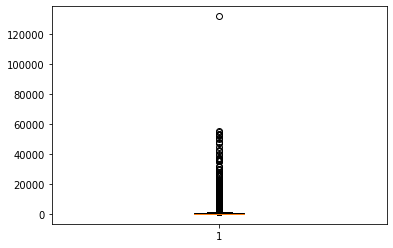

Valores acima de 1500: 3360
% acima de 1500: 9.36898753590051


In [ ]:
plt.boxplot(x=df_clean['price'])
plt.show()

print("Valores acima de 1500: {}".format(len(df_clean[df_clean['price']>1500])))
print("% acima de 1500: {}".format(len(df_clean[df_clean['price']>1500])*100/df_clean.shape[0]))

Como podemos ver com a tabela abaixo,a grande maioria dos dados estão concentrados abaixo de 1500,00 para baixo (90%).Para não apagar tantos dados,irei retirar somente as linhas que contêm preços acima de 1500,00.

**Obs:** A exclusão desses dados representam apenas 9.3% dos dados do dataset.Então mesmo com a saída desses dados não perderia tanta informação.

In [ ]:
price_1500 = df_clean.loc[df_clean['price'] <=1500].shape[0] * 100 / df_clean.shape[0]

print("% menor R$ 1500 : {}".format(round(price_1500,2)))

% menor R$ 1500 : 90.63


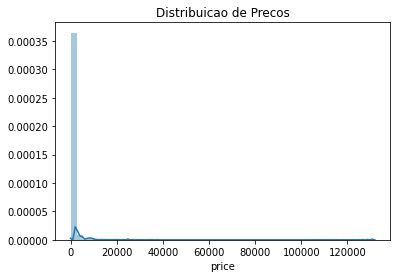

In [ ]:
sns.distplot(df_clean['price'])
plt.title("Distribuicao de Precos");

In [ ]:
# Excluindo os outliers da coluna price

outliers_price = df_clean.loc[df_clean['price'] > 1500].index

df_clean.drop(index=outliers_price,inplace=True)

Agora com a retirada dos outliers os dados estão bem mais claros e dando uma melhor representatividade da realidade.

In [ ]:
print("Media: {}".format(df_clean['price'].mean()))
print("Mediana: {}".format(df_clean['price'].median()))
print("Desvio: {}".format(df_clean['price'].std()))

Media: 373.3459680644863
Mediana: 258.0
Desvio: 311.19247929763804


### **5.Correlação das variáveis.**

Correlação é uma relação entre variáveis onde a mudança entre as variáveis segue uma tendência parecida. Isso não significa causa e efeito.

* Criar matriz de correlação
* Plotar um heatmap para analisar as correlações


In [ ]:
#Definindo a variável de correlacao
corr = df_clean[['name','host_id','neighbourhood','room_type','minimum_nights','number_of_reviews',
                 'reviews_per_month',"availability_365",'price']].corr()

In [ ]:
# Plotando matriz de correlação
corr

,host_id,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
host_id,1.000000,-0.025321,-0.152879,0.090296,-0.012007,-0.116844
minimum_nights,-0.025321,1.000000,-0.025237,-0.026166,0.011584,0.021633
number_of_reviews,-0.152879,-0.025237,1.000000,0.621153,0.049815,-0.161572
reviews_per_month,0.090296,-0.026166,0.621153,1.000000,-0.011837,-0.117580
availability_365,-0.012007,0.011584,0.049815,-0.011837,1.000000,-0.015455
price,-0.116844,0.021633,-0.161572,-0.117580,-0.015455,1.000000


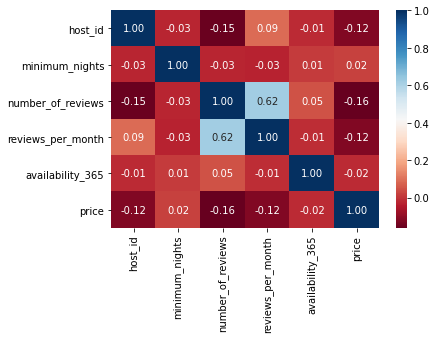

In [ ]:
sns.heatmap(corr,annot=True,cmap="RdBu",fmt='.2f');

Pela análise do mapa de calor podemos verificar que as variáveis não são estão muito correlacionadas. Então muito provavelmente os fatores relacionados com o preço não estão no conjunto de dados,como por exemplo a quantidade de estrelas do imóvel e do vendedor,bem como as descrições do imóvel,como quantidade de quartos,tamanho etc.

### **6.Eliminando variáveis não importantes**

A variável `id`,`calculated_host_listings_count`e `host_name` não são nada importantes para a nossa análise de dados. Então irei excluí-las para diminuir o tamanho do conjunto de dados.

In [ ]:
#Excluindo a coluna id
df_clean.drop(columns=['id','host_id','calculated_host_listings_count'],inplace=True)

In [ ]:
df_clean.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,Very Nice 2Br - Copacabana - WiFi,Matthias,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2.11,0
1,Renovated Modern Apt. Near Beach,Jules,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,1.25,69
2,Beautiful Modern Decorated Studio in Copa,Viviane,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,1.98,95
3,NICE & COZY 1BDR - IPANEMA BEACH,Renata,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2.37,0
4,Cosy flat close to Ipanema beach,Patricia,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2.29,358


### **7.Qual os tipos de imóveis mais alugados?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

Como podemos ver abaixo o tipo `Entire home/apt ` é disparado o mais procurado pelos usuários,visto que são apartamentos únicos para cada usúario.Isso é um indicativo de que os clientes buscam privacidade quando estão procurando por imóveis para alugar.Outro forte indício disso é que o segundo mais procurado é o tipo `Private Room`, que são quartos individuais.Provavelmente pessoas que buscam esse modelo de imóvel são públicos que não querem pagar muito por uma estadia ou mesmo porque não há necessidade de algo maior. 

Quantidade alugada por tipo de imóvel

Entire home/apt    22559
Private room        9018
Shared room          767
Hotel room           159
Name: room_type, dtype: int64
----------------------------------------------------------------------------------------------------
% de demanda por tipo de imóvel

Entire home/apt    69.405901
Private room       27.745131
Shared room         2.359782
Hotel room          0.489186
Name: room_type, dtype: float64






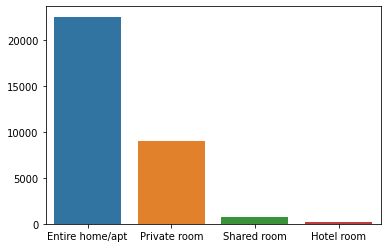

In [ ]:
# Analisando os tipos de imóveis mais alugados

demanda = df_clean['room_type'].value_counts()

print("Quantidade alugada por tipo de imóvel\n")
print(demanda)
print('-'*100)
#Analisando a fatia de cada tipo
print("% de demanda por tipo de imóvel\n")
print((demanda*100/len(df_clean['room_type'])))
print("\n"*3)
sns.barplot(demanda.index,demanda.values);


### **8.Características dos imóveis mais caros**

A última parte da análise conssiste em analisar quais as características dos imóveis mais caros na cidade do Rio de Janeiro.

* Alugueis mais caros por bairro
* Alugueis mais caros por tipo de quarto
* Alugueis mais caros por localidade


#### *8a.Alugueis mais caros  por bairro*

In [ ]:
# Agrupando a média de preço por bairro
bairros_grp = df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:15]

bairros_grp

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     518.174174
Abolição                  483.666667
Leblon                    479.558090
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Engenho de Dentro         470.861111
Barra da Tijuca           470.132760
Inhoaíba                  466.000000
Jacarepaguá               464.663866
Maracanã                  461.579767
Name: price, dtype: float64

Nessa lista coloquei as **15 maiores médias de preço por bairro** e surpreendentemente os **bairros Leblon,Barra da Tijuca não estão entre os primeiros colocados**. Mas como não podem estar entre os primeiros visto que eles são conhecidos como bairros de elite do Rio? Bom **os primeiros valores não possuem uma amostra significativa**,tem poucos valores,e **podem ter sido eventos peculiares** como aluguel de uma casa bem cara. Mas como esses bairros têm poucos dados,irei apagá-los do conjunto de dados para que a análise tenha mais representatividade.

In [ ]:
#Eliminando bairros com menos de 150 instâncias
for value in bairros_grp.index:
  
  if df_clean.loc[df_clean['neighbourhood']==value].shape[0] < 150:

    df_clean.drop(index=df_clean.loc[df_clean['neighbourhood']==value].index,inplace=True)

Agora pode-se ver que a média dos bairros mais alugados estão mais próximos do bom senso da realidade.
Pode-se achar estranho mas Copacabana não está entre os 10 primeiros.
Conforme cálculo abaixo,a média de aluguel do bairro de Copacabana é apenas R$338,00. 
----------------------------------------------------------------------------------------------------


neighbourhood
Lagoa                       518.174174
Leblon                      479.558090
Barra da Tijuca             470.132760
Jacarepaguá                 464.663866
Maracanã                    461.579767
Ipanema                     457.094505
São Conrado                 454.314607
Recreio dos Bandeirantes    454.140149
Vargem Grande               449.336449
Pedra de Guaratiba          441.133333
Name: price, dtype: float64

----------------------------------------------------------------------------------------------------


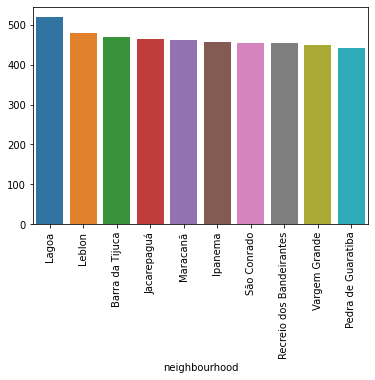

In [ ]:
new_bairro_grp = df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

sns.barplot(x=new_bairro_grp.index[:10],y=new_bairro_grp.values[:10])
plt.xticks(rotation=90);

print("""Agora pode-se ver que a média dos bairros mais alugados estão mais próximos do bom senso da realidade.
Pode-se achar estranho mas Copacabana não está entre os 10 primeiros.\nConforme cálculo abaixo,a média de aluguel do bairro de Copacabana é apenas R$338,00. """)

print('-'*100)

display(new_bairro_grp[:10])
print("-"*100)

In [ ]:
posicoes = pd.DataFrame(new_bairro_grp.index)

print('Média',df_clean.loc[df_clean['neighbourhood']=='Copacabana']['price'].mean())
print('Posição 42')



Média 338.7632409285553
Posição 42


#### *8b.Alugueis mais caros por tipo de imóvel*

Conforme gráfico abaixo pode-se ver que os tipos de imóveis mais caros são casas e apartamentos e quartos individuiais.

In [ ]:
df_clean.groupby('room_type')['price'].mean()

room_type
Entire home/apt    438.053454
Hotel room         262.176101
Private room       227.328980
Shared room        181.812827
Name: price, dtype: float64

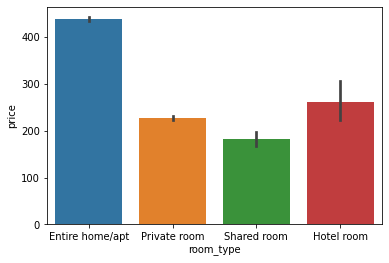

In [ ]:
sns.barplot(x=df_clean['room_type'],y=df_clean['price'])
plt.show()

#### *8c.Alugueis mais caros por localidade*

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

In [ ]:
mapa = df_clean.copy()

def price_category(data):

  if data >= 1000:
    return "Acima 1000"
  elif data < 1000:
    return "Abaixo 1000"

mapa['price_category'] = mapa['price'].apply(price_category)


plx.set_mapbox_access_token(open('/content/mapbox token.txt').read())

print('Como era de se esperar os imóveis mais caros estão situados,em sua grande maioria,em regiões praianas. ')

plx.scatter_mapbox(mapa,lat=mapa['latitude'],lon=mapa['longitude'],
                   color='price_category',size_max=15,zoom=10,title="Imóveis Acima e Abaixo de R$1000,00",color_continuous_scale=plx.colors.cyclical.IceFire)


Como era de se esperar os imóveis mais caros estão situados,em sua grande maioria,em regiões praianas. 


## **Conclusão**

A partir dos dados resumidos que o site [Inside Airbnb]((http://insideairbnb.com/get-the-data.html) proporcionou fiz uma análise básica das características dos imóveis mais procurados da cidade do Rio de Janeiro e obtive as seguintes conclusões:

* Os imóveis mais procurados são do tipo casa/Apartamento,representando 69,4% do total,seguido por quartos privados com 27,7%.

**Obs: Os hotéis representam apenas 0,49% da demanda.**

* A média dos imóveis mais caros está localizada nos imóveis do tipo Casa/Apartamento com média de R$ 438,00,seguido por hotéis com média de RS258,9.

* Os bairros mais caros são: Lagoa(RS518,00) , Leblon(RS479,5) e Barra da Tijuca(RS470,13).

* Os imóveis mais caros estão situados em regiões praianas.


In [ ]:
df.groupby('neighbourhood').count().index

Index(['Abolição', 'Alto da Boa Vista', 'Anchieta', 'Andaraí', 'Anil',
       'Bancários', 'Bangu', 'Barra da Tijuca', 'Barra de Guaratiba',
       'Barros Filho',
       ...
       'Vargem Pequena', 'Vasco da Gama', 'Vaz Lobo', 'Vicente de Carvalho',
       'Vidigal', 'Vila Isabel', 'Vila Militar', 'Vila Valqueire',
       'Vila da Penha', 'Água Santa'],
      dtype='object', name='neighbourhood', length=141)